<a href="https://colab.research.google.com/github/Behnam-H/qiskit-learning/blob/main/S1%20EP8%20Mitigating%20Noise%20on%20Real%20Quantum%20Computers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install qiskit pylatexenc

In [2]:
from qiskit import *

In [3]:
nqubits = 3
circuit = QuantumCircuit(nqubits, nqubits)
circuit.h(0)
circuit.cx(0,1)
circuit.cx(1,2)
circuit.measure([0,1,2], [0,1,2])

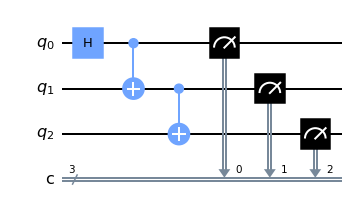

In [4]:
%matplotlib inline
circuit.draw(output='mpl')

In [6]:
simulator = Aer.get_backend('qasm_simulator')
sim_result = execute(circuit, backend=simulator, shots=1024).result()

In [7]:
from qiskit.tools.visualization import plot_histogram

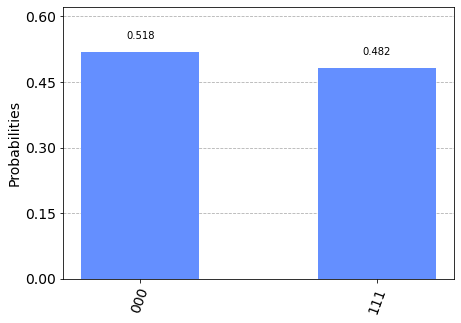

In [8]:
plot_histogram(sim_result.get_counts(circuit))

In [9]:
from qiskit import IBMQ

In [10]:
IBMQ.save_account('IBM API TOKEN')

In [11]:
IBMQ.load_account()

/usr/local/lib/python3.6/dist-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [12]:
provider = IBMQ.get_provider(hub='ibm-q')
device = provider.get_backend('ibmqx2')

In [14]:
job = execute(circuit, backend=device, shots=1024)
print(job.job_id())
from qiskit.tools.monitor import job_monitor
job_monitor(job)

601bf16b87323b27f0e54834
Job Status: job has successfully run


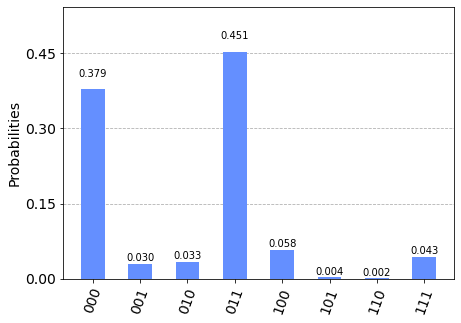

In [18]:
device_result = job.result()
plot_histogram(device_result.get_counts(circuit))

In [20]:
from qiskit.ignis.mitigation.measurement import (complete_meas_cal, CompleteMeasFitter)

In [21]:
cal_circuits, state_labels = complete_meas_cal(qr=circuit.qregs[0], circlabel= 'measerrormitigationcal')

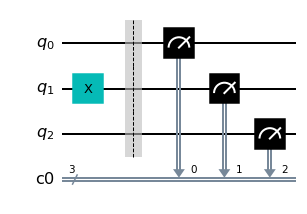

In [22]:
cal_circuits[2].draw(output='mpl')

In [23]:
len(cal_circuits)

8

In [24]:
cal_job = execute(cal_circuits, backend=device,shots=1024, optimization_level=0)
print(cal_job.job_id())
job_monitor(cal_job)
cal_result = cal_job.result()

601c0df82d6145cc9cd5d565
Job Status: job has successfully run


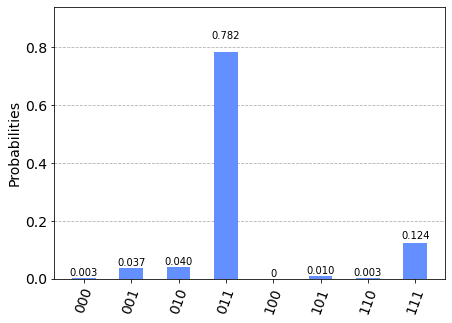

In [25]:
plot_histogram(cal_result.get_counts(cal_circuits[3]))

In [26]:
meas_fitter = CompleteMeasFitter(cal_result, state_labels)

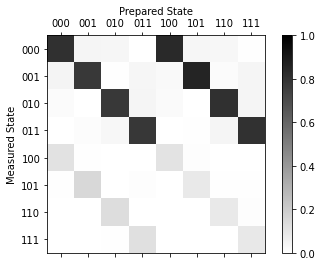

In [27]:
meas_fitter.plot_calibration()

In [28]:
meas_filter = meas_fitter.filter

In [29]:
mitigated_result = meas_filter.apply(device_result)

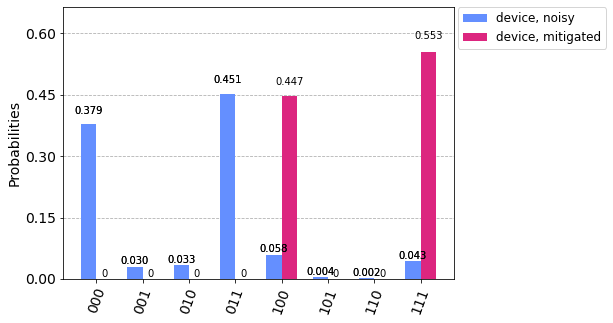

In [38]:
device_counts = device_result.get_counts(circuit)
mitigated_counts = mitigated_result.get_counts(circuit)
plot_histogram([device_counts, mitigated_counts], legend=['device, noisy', 'device, mitigated'])

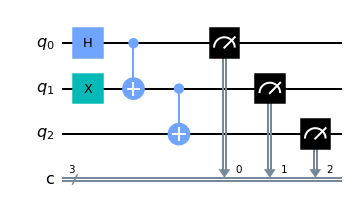

In [39]:
circuit2 = QuantumCircuit(3, 3)
circuit2.x(1)
circuit2.h(0)
circuit2.cx(0,1)
circuit2.cx(1,2)
circuit2.measure([0,1,2],[0,1,2])
circuit2.draw(output='mpl')

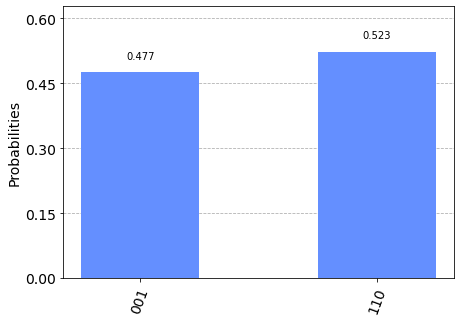

In [41]:
plot_histogram(execute(circuit2, backend=simulator,shots=1024).result().get_counts(circuit2))

In [42]:
device_counts_2 = execute(circuit2, backend=device,shots=1024).result().get_counts(circuit2)

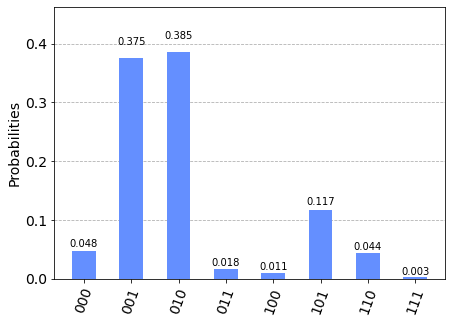

In [43]:
plot_histogram(device_counts_2)

In [44]:
device_counts_mitigated_2 = meas_filter.apply(device_counts_2)

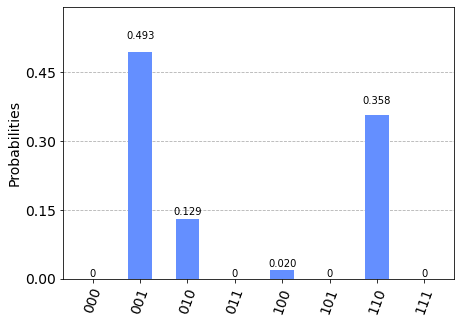

In [45]:
plot_histogram(device_counts_mitigated_2)